# Python practise file

## Use pandas, filter and explore Zoopla data on mean rent and number of adverts by local authority

### Source for Zoopla data: UBDC http://ubdc.gla.ac.uk/dataset/zoopla-property-data/resource/b3523cc0-104c-4f79-affa-ba8c2ecb004d 

In [1]:
import pandas as pd
import glob

### Import csv files

In [73]:
rent_by_la = pd.read_csv(r"C:\Users\johan\Zoopla\rentbyla.csv")

In [74]:
rent_by_la.head()

,authority_code,authority_name,year,quarter,mean_rent_per_month,median_rent_per_month
0,E06000001,Hartlepool,2011,4,517.837838,450.0
1,E06000001,Hartlepool,2012,4,524.358209,477.5
2,E06000001,Hartlepool,2012,3,491.654206,450.0
3,E06000001,Hartlepool,2012,2,492.138889,450.0
4,E06000001,Hartlepool,2012,1,455.589744,464.0


In [75]:
num_adverts = pd.read_csv(r"C:\Users\johan\Zoopla\countofnumberadverts.csv")

In [76]:
num_adverts.head()

,authority_code,authority_name,year,quarter,num_adverts
0,E06000001,Hartlepool,2011,4,74
1,E06000001,Hartlepool,2012,2,72
2,E06000001,Hartlepool,2012,3,107
3,E06000001,Hartlepool,2012,4,67
4,E06000001,Hartlepool,2012,1,39


### Merge csv files


In [137]:
# 
Zoopla_Rent = rent_by_la.merge(num_adverts, how= 'left', on=['authority_code', 'year', 'quarter'], 
                             indicator = (True), validate=('1:m'))

In [138]:
Zoopla_Rent

,authority_code,authority_name_x,year,quarter,mean_rent_per_month,median_rent_per_month,authority_name_y,num_adverts,_merge
0,E06000001,Hartlepool,2011,4,517.837838,450.0,Hartlepool,74,both
1,E06000001,Hartlepool,2012,4,524.358209,477.5,Hartlepool,67,both
2,E06000001,Hartlepool,2012,3,491.654206,450.0,Hartlepool,107,both
3,E06000001,Hartlepool,2012,2,492.138889,450.0,Hartlepool,72,both
4,E06000001,Hartlepool,2012,1,455.589744,464.0,Hartlepool,39,both
...,...,...,...,...,...,...,...,...,...
8861,W06000024,Merthyr Tydfil,2015,4,456.739130,445.0,Merthyr Tydfil,46,both
8862,W06000024,Merthyr Tydfil,2016,4,461.764706,450.0,Merthyr Tydfil,34,both
8863,W06000024,Merthyr Tydfil,2016,1,448.133333,450.0,Merthyr Tydfil,30,both
8864,W06000024,Merthyr Tydfil,2016,3,453.125000,450.0,Merthyr Tydfil,48,both


In [151]:
# did the merge do what we want? look at year and quarter

rentdata = Zoopla_Rent.sort_values('authority_code').groupby(['year', 'quarter'])
rentdata.head()

,authority_code,authority_name_x,year,quarter,mean_rent_per_month,median_rent_per_month,authority_name_y,num_adverts,_merge
0,E06000001,Hartlepool,2011,4,517.837838,450.0,Hartlepool,74,both
20,E06000001,Hartlepool,2016,2,469.837696,450.0,Hartlepool,191,both
19,E06000001,Hartlepool,2016,4,481.822785,470.0,Hartlepool,79,both
18,E06000001,Hartlepool,2016,1,445.181818,433.0,Hartlepool,154,both
17,E06000001,Hartlepool,2016,3,469.081482,457.0,Hartlepool,135,both
...,...,...,...,...,...,...,...,...,...
181,E06000009,Blackpool,2011,1,554.395349,542.0,Blackpool,129,both
180,E06000009,Blackpool,2011,2,527.559783,524.0,Blackpool,184,both
202,E06000010,"Kingston upon Hull, City of",2011,2,462.530275,446.0,"Kingston upon Hull, City of",545,both
203,E06000010,"Kingston upon Hull, City of",2011,1,471.699627,446.0,"Kingston upon Hull, City of",536,both


In [152]:
# what variables 

print(Zoopla_Rent.columns.values)

['authority_code' 'authority_name_x' 'year' 'quarter'
 'mean_rent_per_month' 'median_rent_per_month' 'authority_name_y'
 'num_adverts' '_merge']



#### Slice only data from Glasgow

In [153]:
glasgow = Zoopla_Rent[Zoopla_Rent.authority_name_y == 'Glasgow City']

In [154]:
glasgow.head()

,authority_code,authority_name_x,year,quarter,mean_rent_per_month,median_rent_per_month,authority_name_y,num_adverts,_merge
8330,S12000046,Glasgow City,2011,2,582.192308,559.0,Glasgow City,52,both
8331,S12000046,Glasgow City,2011,1,587.500000,524.0,Glasgow City,52,both
8332,S12000046,Glasgow City,2011,4,635.152632,575.0,Glasgow City,190,both
8333,S12000046,Glasgow City,2011,3,593.172840,546.0,Glasgow City,162,both
8334,S12000046,Glasgow City,2012,4,574.802013,525.0,Glasgow City,596,both


#### Describe data

In [155]:
glasgow.shape

(24, 9)

In [156]:
glasgow.describe()


,year,quarter,mean_rent_per_month,median_rent_per_month,num_adverts
count,24.000000,24.00000,24.000000,24.000000,24.000000
mean,2013.500000,2.50000,637.570040,561.291667,598.416667
std,1.744557,1.14208,57.774324,27.815353,338.694670
min,2011.000000,1.00000,569.500000,524.000000,52.000000
25%,2012.000000,1.75000,587.820833,546.000000,459.500000
50%,2013.500000,2.50000,642.839136,550.000000,640.000000
75%,2015.000000,3.25000,673.157388,578.750000,739.000000
max,2016.000000,4.00000,798.225150,625.000000,1670.000000


#### What was the mean rent in Glasgow for each year?

In [157]:

glasgow['mean_rent_per_month'].value_counts()


579.804631    1
720.591331    1
569.500000    1
582.192308    1
650.525641    1
602.323671    1
798.225150    1
669.294953    1
589.099415    1
635.152632    1
658.844622    1
683.308229    1
670.680342    1
599.418342    1
574.154689    1
574.802013    1
587.927778    1
680.588525    1
593.172840    1
652.748634    1
682.918587    1
696.966250    1
661.940389    1
587.500000    1
Name: mean_rent_per_month, dtype: int64

In [158]:
# how many missings
 
glasgow.isna().sum()

# no missing data

authority_code           0
authority_name_x         0
year                     0
quarter                  0
mean_rent_per_month      0
median_rent_per_month    0
authority_name_y         0
num_adverts              0
_merge                   0
dtype: int64

In [159]:
# sort values by year

glasgow_by_year = glasgow.sort_values('year', ascending = False).groupby(['year', 'quarter'])

In [160]:
glasgow_by_year.head()

,authority_code,authority_name_x,year,quarter,mean_rent_per_month,median_rent_per_month,authority_name_y,num_adverts,_merge
8353,S12000046,Glasgow City,2016,3,696.966250,625.0,Glasgow City,800,both
8352,S12000046,Glasgow City,2016,2,683.308229,600.0,Glasgow City,717,both
8351,S12000046,Glasgow City,2016,4,652.748634,595.0,Glasgow City,549,both
8350,S12000046,Glasgow City,2016,1,682.918587,595.0,Glasgow City,651,both
8349,S12000046,Glasgow City,2015,2,669.294953,590.0,Glasgow City,634,both
8348,S12000046,Glasgow City,2015,3,680.588525,600.0,Glasgow City,610,both
8347,S12000046,Glasgow City,2015,1,670.680342,550.0,Glasgow City,585,both
8346,S12000046,Glasgow City,2015,4,658.844622,575.0,Glasgow City,502,both
8343,S12000046,Glasgow City,2014,1,720.591331,550.0,Glasgow City,646,both
8345,S12000046,Glasgow City,2014,3,661.940389,575.0,Glasgow City,822,both


### Calculate mean rent per year


In [161]:
glasgow['mean_rent_per_month'].value_counts().sort_values()


579.804631    1
696.966250    1
682.918587    1
652.748634    1
593.172840    1
680.588525    1
587.927778    1
574.802013    1
574.154689    1
599.418342    1
670.680342    1
683.308229    1
658.844622    1
635.152632    1
589.099415    1
669.294953    1
798.225150    1
602.323671    1
650.525641    1
582.192308    1
569.500000    1
720.591331    1
661.940389    1
587.500000    1
Name: mean_rent_per_month, dtype: int64

#### Get mean rent by year 


In [165]:
gla_year_rent = glasgow.groupby(['year']).mean()

In [166]:
gla_year_rent

,quarter,mean_rent_per_month,median_rent_per_month,num_adverts
year,,,,
2011,2.5,599.504445,551.00,114.00
2012,2.5,583.931275,541.75,497.50
2013,2.5,585.326360,536.25,757.00
2014,2.5,707.820628,556.25,960.00
2015,2.5,669.852110,578.75,582.75
2016,2.5,678.985425,603.75,679.25


In [237]:
gla_year_rent['mean_rent_per_month']


year
2011    599.504445
2012    583.931275
2013    585.326360
2014    707.820628
2015    669.852110
2016    678.985425
Name: mean_rent_per_month, dtype: float64

### Graph mean rent by year


In [246]:
# sort descending by year first

year_mean = gla_year_rent.sort_values('year', ascending = False)


<AxesSubplot:title={'center':'Yearly Average Rent'}, ylabel='year'>

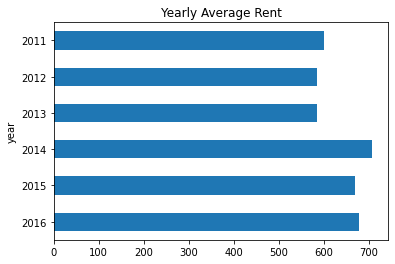

In [247]:
year_mean_rent = year_mean['mean_rent_per_month']

year_mean_rent.plot.barh(x= 'Year', y = '£', title = 'Yearly Average Rent')